# BINF-F401 - Computational Methods for Functional Genomics

## Question 1. Exploration of clinical variables

In [89]:
# Read the TSV file into a data frame
clinical_data <- read.table("clinical_data.tsv", header = TRUE, sep = "\t")

# Display the first few rows of the data frame to verify it was read correctly
#head(clinical_data)
head(clinical_data)

,SMPLID,SUBJID,COHORT,SEX,AGE,HGHT,WGHT,BMI,SMPTHNTS,TRISCHD,DTHVNT,DTHHRDY,SMPLID.1,IMGURL
,<chr>,<chr>,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<int>,<int>,<chr>,<chr>
1,GTEX.111YS.0526,GTEX.111YS,Organ Donor (OPO),1,62,72.0,227,30.78,NO_REPORT,74,1,0,GTEX-111YS-0525,https://brd.nci.nih.gov/brd/specimen/GTEX-111YS-0526
2,GTEX.1122O.1126,GTEX.1122O,Organ Donor (OPO),2,64,66.0,203,32.76,NO_REPORT,35,1,0,GTEX-1122O-1125,https://brd.nci.nih.gov/brd/specimen/GTEX-1122O-1126
3,GTEX.1128S.0326,GTEX.1128S,Postmortem,2,66,66.0,160,25.82,NO_REPORT,816,0,2,GTEX-1128S-0325,https://brd.nci.nih.gov/brd/specimen/GTEX-1128S-0326
4,GTEX.117XS.0426,GTEX.117XS,Postmortem,1,64,71.0,220,30.68,NO_REPORT,848,0,2,GTEX-117XS-0425,https://brd.nci.nih.gov/brd/specimen/GTEX-117XS-0426
5,GTEX.117YW.0226,GTEX.117YW,Postmortem,1,58,72.0,220,29.83,NO_REPORT,785,0,3,GTEX-117YW-0225,https://brd.nci.nih.gov/brd/specimen/GTEX-117YW-0226
6,GTEX.11DXX.0426,GTEX.11DXX,Organ Donor (OPO),2,66,64.5,128,21.63,NO_REPORT,56,1,0,GTEX-11DXX-0425,https://brd.nci.nih.gov/brd/specimen/GTEX-11DXX-0426


Here is a brief description of what each variable represents

- `AGE` is the age of the donor
- `SEX` is the sex of the donor
- `HGHT` is the height of the donor
- `WGHT` is the weight of the donor
- `BMI` is the Body Mass Index of the donor, which is defined as $\frac{\texttt{weight}}{\texttt{height}^2}$

Technical variables

- `COHORT` is a type of donor, there is 'Organ donor' and 'Postmortem'
- `TRISCHD` is the ischemic time (measured in minutes) and corresponds to the time elapsed bewteen the donor's death and tissue collection
- `DTHVNT` indicates whether the subject died under a ventilator or not
- `DTHHRDY` is the Hardy scale. It is a number between $0$ and $4$ summarizing the circumstances of death
  
  * $0=$ death under ventilator
  * $1=$ violent and rapid death
  * $2=$ rapid death due to natural causes
  * $3=$ intermediate death
  * $4=$ slow death
 
Miscalleneous

- `SUBJID` is the GTEx ID of the subject
- `SMPLID` is the GTEx ID of the organ
- `SMPLID.1` is another ID for the sample
- `SMPTHNTS` is a field indicating the sample's pathology notes taken by the pathologists who examined the histological slice
- `IMGURL` is a link to the interactively zoomable high resolution scan of the histological slice

In our analyses we will discard all the miscalleneous variables except the `SMPLID` which will serve as names for the rows or columns of matrices of clinical variables. The reason for this is that `SUBJID` only identifies the subject and offers no relevant information, `SMPLID.1` is just another identifier for the samples, but `SMPLID` already serves this purpose, `SMPTHNTS` contains no information at all, as we can see by executing the following command

In [228]:
any(clinical_data$SMPTHNTS!='NO_REPORT')

[1] FALSE

and finally `IMGURL` cannot be processed as it is a link to an interactive webpage and not an entity that can be manipulated by the `R` programming language in any meaningful way for our purposes. The relevant information contained in the scans of the histological slices is in fact encoded, in a manner which is amenable to analysis with the tools provided by `R`, in the morphological counts matrix we have been given.

In addition to the miscalleneous variables, we can suspect that the `DTHVNT` variable is redundant since death under ventilator is a category of the Hardy scale. Let's investigate whether we ought to keep the variable or not. Formally, we can check if there is a one-to-one correspondance between the subjects who died under a ventilator according to `DTHVNT` and those whose circumstances of death were registered on the $0$ level of the Hardy scale.

In [286]:
#Check whether DTHVNT==1 => DTHHRDY==0
!any(clinical_data$DTHVNT==1&clinical_data$DTHHRDY!=0)
#Check whether DTHHRDY==0 => DTHVNT==1
!any(clinical_data$DTHVNT!=1&clinical_data$DTHHRDY==0)

[1] FALSE

[1] TRUE

As we can see, although all subjects who were recorded as dying under a ventilator according to the Hardy scale were also recorded as such under `DTHVNH` (so at least the data is consistent in that regard), not all subjects who did in fact die under a ventilator were grouped into the $0$ level of the Hardy scale. Premusably this is because some had circumstances surrounding their death which required grouping them under another level of the scale (e.g. a slow death). Nevertheless we can still check if there is still an almost one-to-one correspondance between the categories `DTHVNT==1` and `DTHHRDY==0`. The way to do this is by drawing a barplot of the relationship between the two categorical variables.

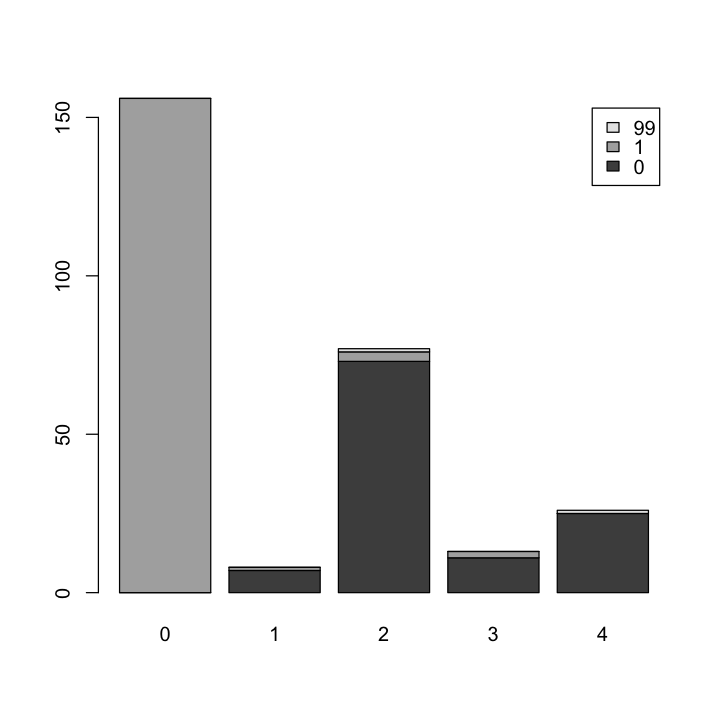

In [282]:
options(repr.plot.width=6, repr.plot.height=6)
barplot(table(clinical_data$DTHVNT, clinical_data$DTHHRDY),legend.text=TRUE)

We can clearly see that this is indeed the case. Therefore, we can consider the `DTHVNT` variable as largely redundant and discard it from our analysis for the remainder of this project.

In order to have a visual representation of the distributions of the clinical variables, we now plot histograms for all the variables we have determined to be relevant.

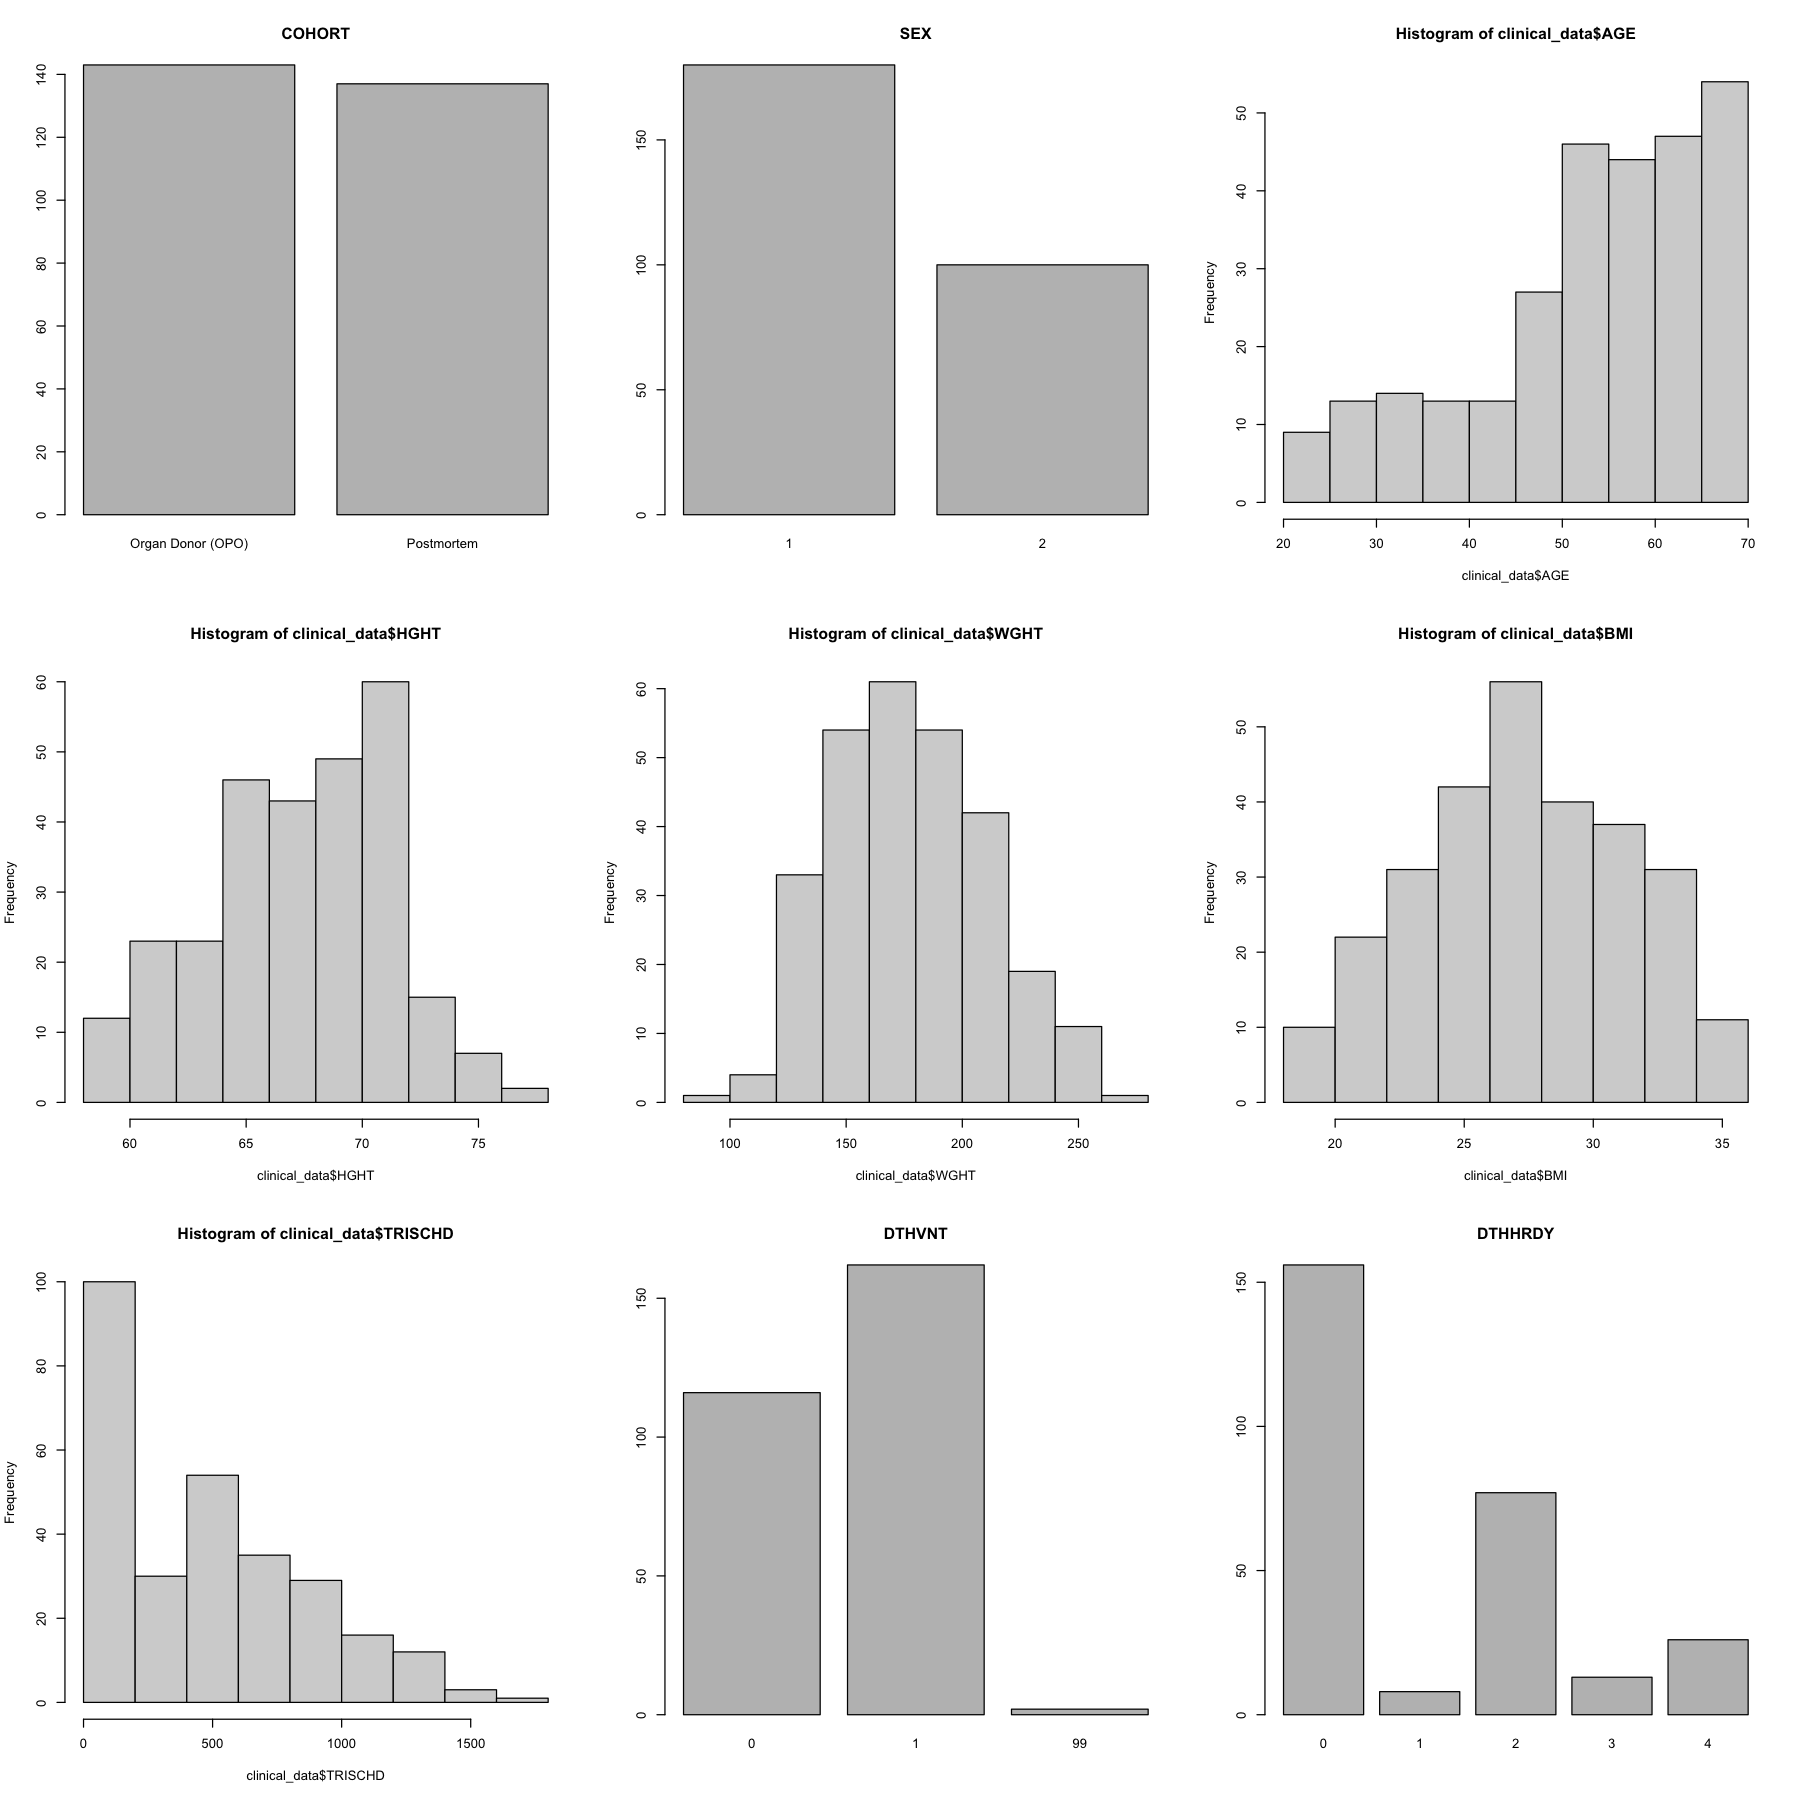

In [2]:
par(mfrow = c(3, 3)) 
options(repr.plot.width=15, repr.plot.height=15)

barplot(table(clinical_data$COHORT), main="COHORT")
barplot(table(clinical_data$SEX), main="SEX")
hist(clinical_data$AGE)
hist(clinical_data$HGHT)
hist(clinical_data$WGHT)
hist(clinical_data$BMI)
hist(clinical_data$TRISCHD)
barplot(table(clinical_data$DTHVNT), main="DTHVNT")
barplot(table(clinical_data$DTHHRDY), main="DTHHRDY")

Now we will explore the pairwise relationships between each variable. Since there are $8$ variables, this means there are $\binom{8}{2}=28$ binary relationships to explore. This a lot so we will try to groups the plots together. First we begin with the pairwise relationships between categorical variables, which we representent by using barplots.

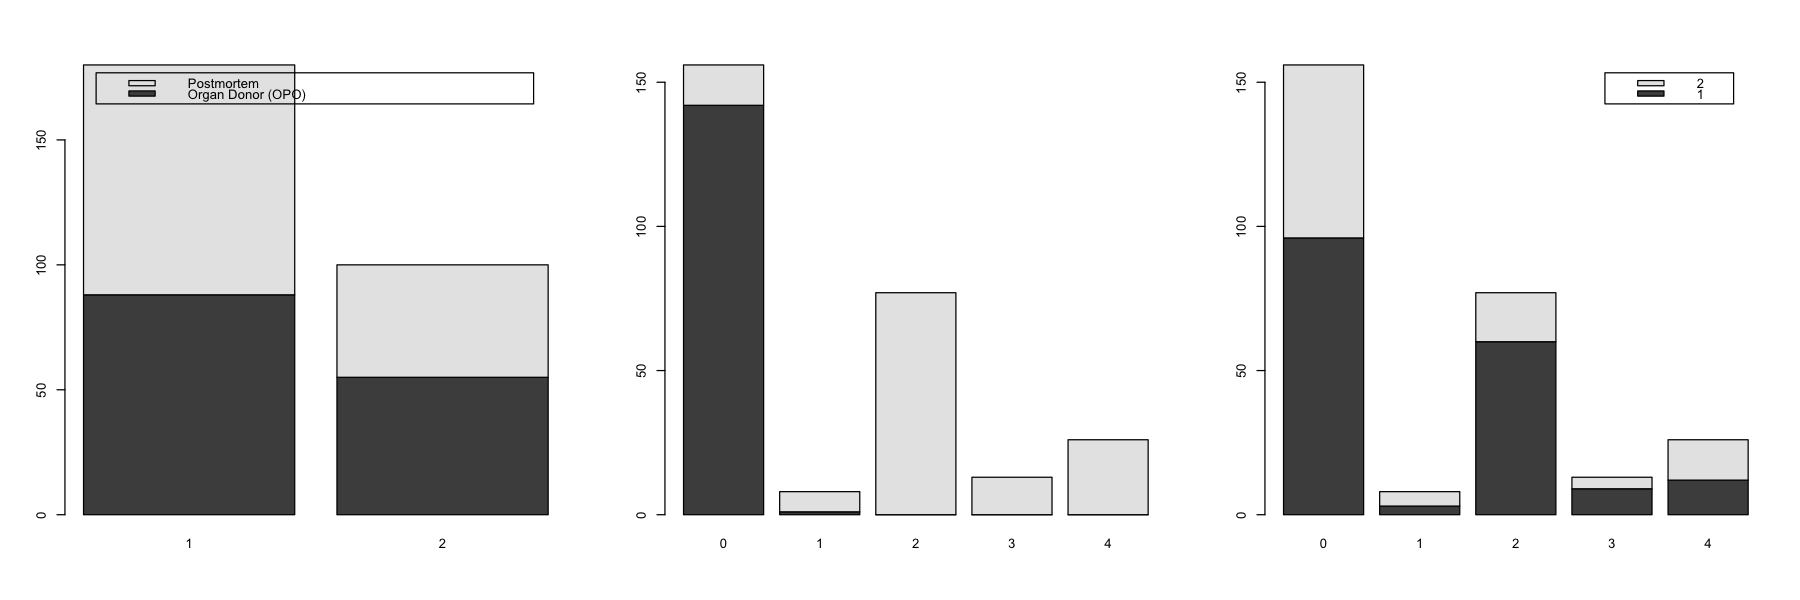

In [277]:
par(mfrow = c(1, 3)) 
options(repr.plot.width=15, repr.plot.height=5)
barplot(table(clinical_data$COHORT, clinical_data$SEX),legend.text=TRUE)
barplot(table(clinical_data$COHORT, clinical_data$DTHHRDY))
barplot(table(clinical_data$SEX, clinical_data$DTHHRDY),legend.text=TRUE)

To evaluate whether the categorical variables are independant of each other, we run a Pearson's chi-squared test for all pairs of categorical variables

In [287]:
chisq.test(clinical_data$COHORT, clinical_data$SEX)
chisq.test(clinical_data$COHORT, clinical_data$DTHHRDY)
chisq.test(clinical_data$SEX, clinical_data$DTHHRDY)


	Pearson's Chi-squared test with Yates' continuity correction

data:  clinical_data$COHORT and clinical_data$SEX
X-squared = 0.73176, df = 1, p-value = 0.3923


Warning message in chisq.test(clinical_data$COHORT, clinical_data$DTHHRDY):
“L’approximation du Chi-2 est peut-être incorrecte”



	Pearson's Chi-squared test

data:  clinical_data$COHORT and clinical_data$DTHHRDY
X-squared = 225.5, df = 4, p-value < 2.2e-16


Warning message in chisq.test(clinical_data$SEX, clinical_data$DTHHRDY):
“L’approximation du Chi-2 est peut-être incorrecte”



	Pearson's Chi-squared test

data:  clinical_data$SEX and clinical_data$DTHHRDY
X-squared = 13.111, df = 4, p-value = 0.01075


We also run Fisher's exact test for each pair.

In [288]:
fisher.test(clinical_data$COHORT, clinical_data$SEX)
fisher.test(clinical_data$COHORT, clinical_data$DTHHRDY)
fisher.test(clinical_data$SEX, clinical_data$DTHHRDY)


	Fisher's Exact Test for Count Data

data:  clinical_data$COHORT and clinical_data$SEX
p-value = 0.3827
alternative hypothesis: true odds ratio is not equal to 1
95 percent confidence interval:
 0.4647701 1.3157458
sample estimates:
odds ratio 
 0.7833011 



	Fisher's Exact Test for Count Data

data:  clinical_data$COHORT and clinical_data$DTHHRDY
p-value < 2.2e-16
alternative hypothesis: two.sided



	Fisher's Exact Test for Count Data

data:  clinical_data$SEX and clinical_data$DTHHRDY
p-value = 0.008351
alternative hypothesis: two.sided


The two tests agree on concluding that the variables `COHORT` and `SEX` are independant while `COHORT` and `DTHHRDY` are not, as well as `SEX` and `DTHHRDY`.

Next we represent how each continuous variable is distributed in each category of the categorical variables. This requires the use of boxplots.

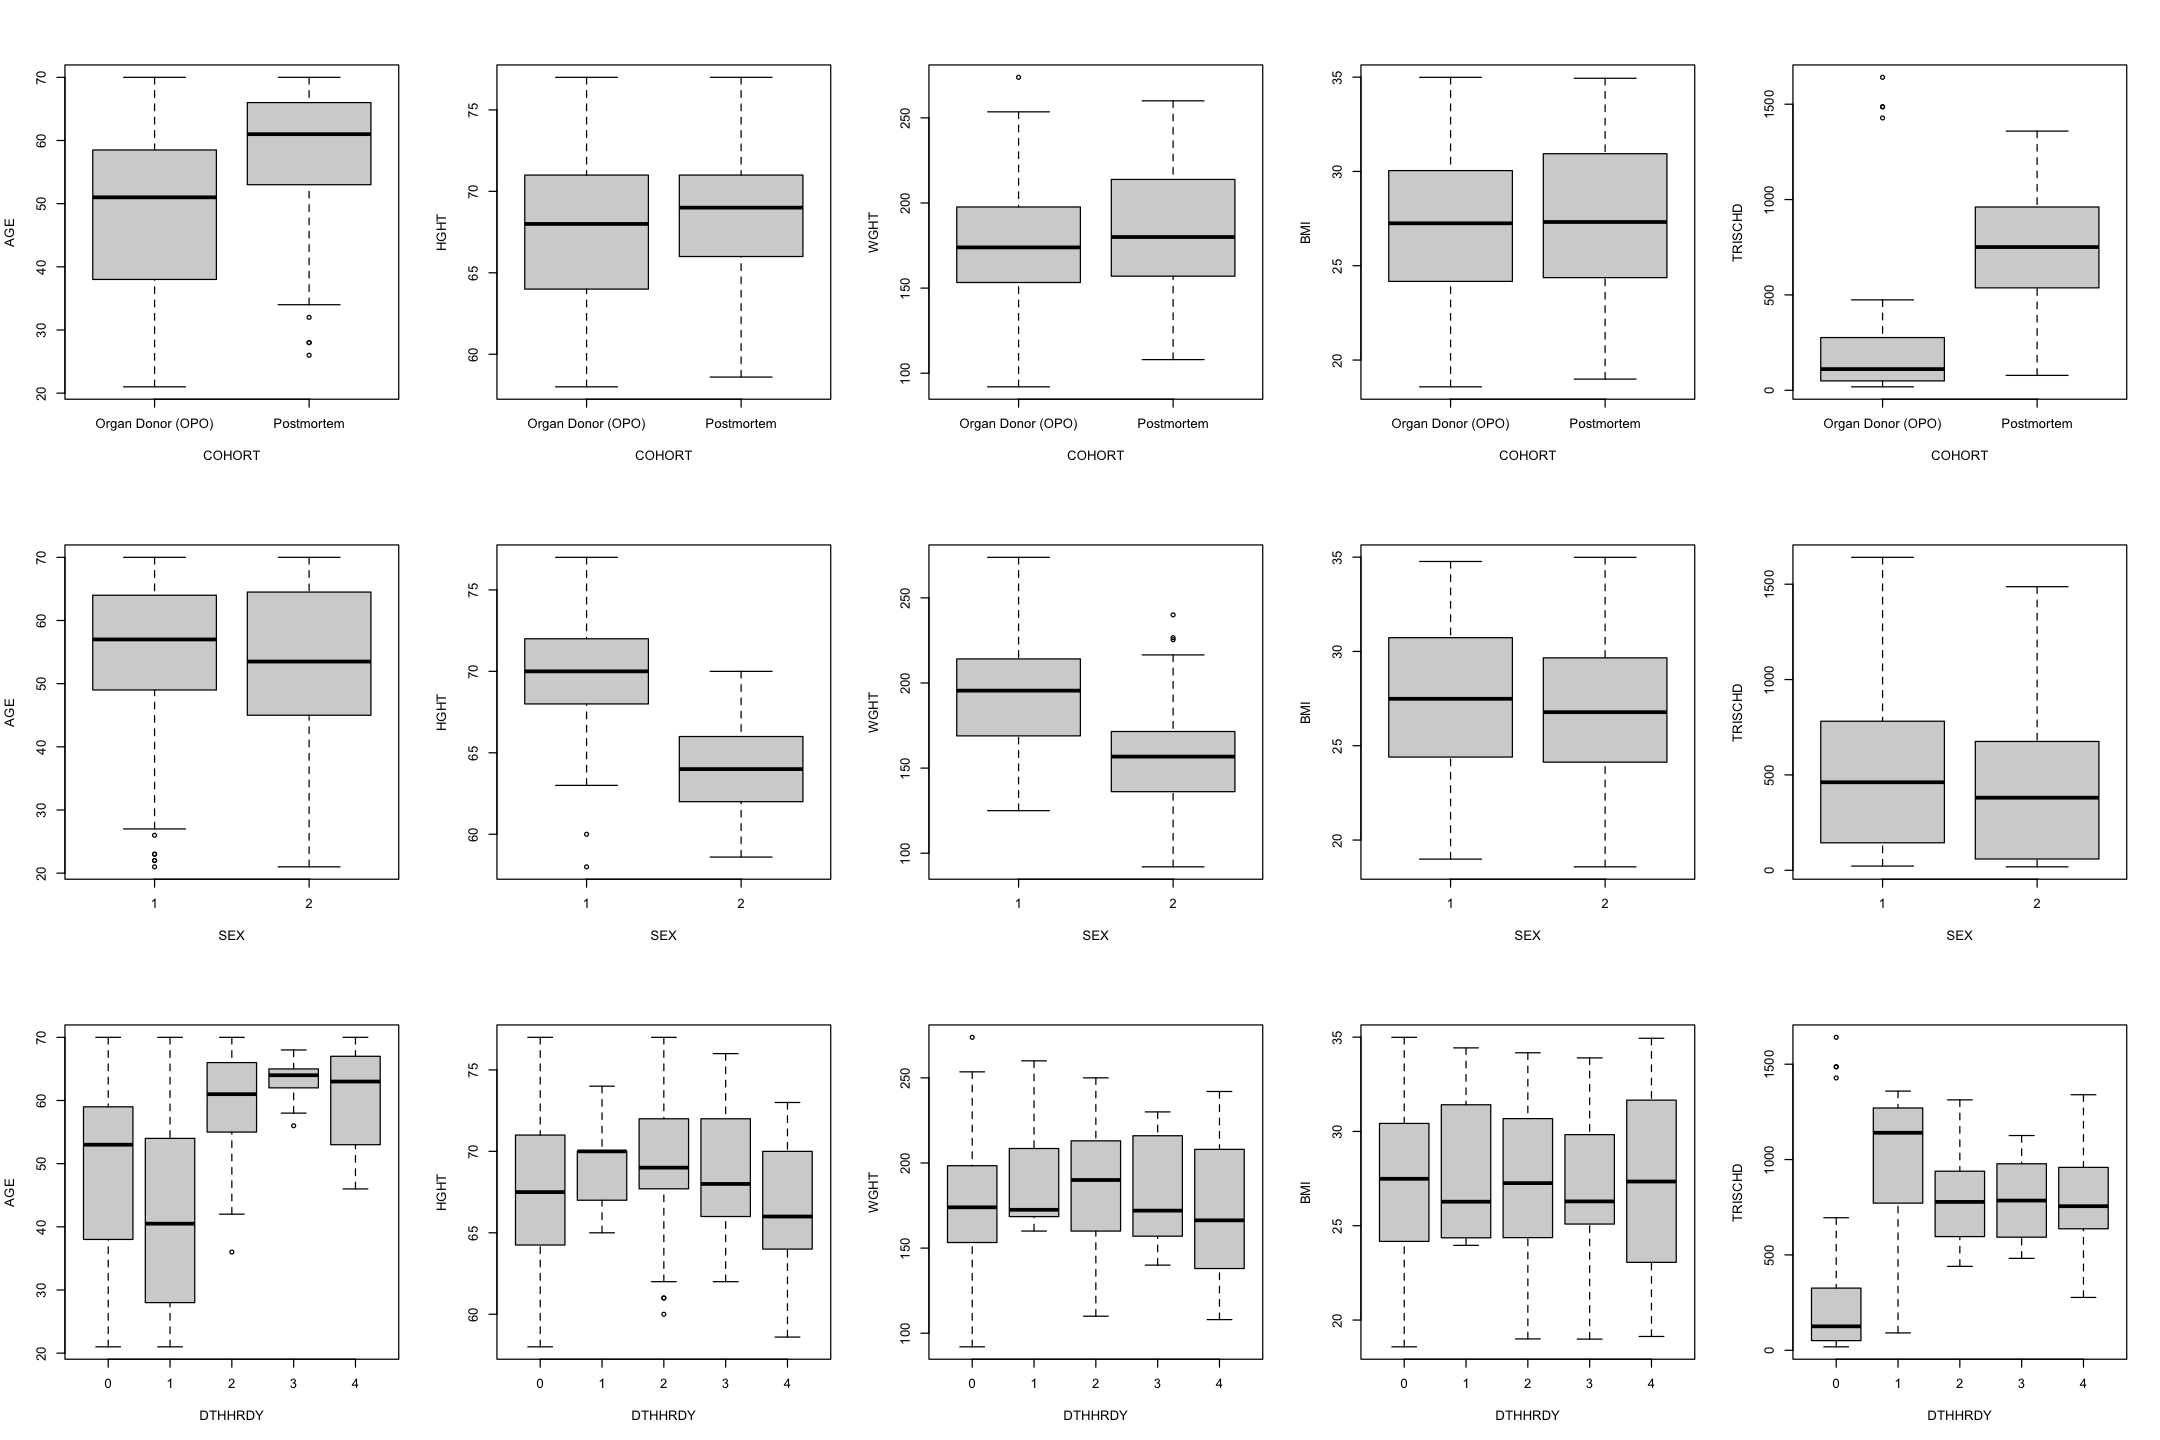

In [269]:
par(mfrow = c(3, 5))
options(repr.plot.width=18, repr.plot.height=12)
for (catvar in c('COHORT','SEX','DTHHRDY')){
    for (contvar in c('AGE','HGHT','WGHT','BMI','TRISCHD')){
        boxplot(as.formula(paste(contvar,"~",catvar)), data=clinical_data)
    }
}

And finally we show graphs of the relationships between each pair of continuous variables. We include on each graph the line of regression computed by the `lm` function for the relationship.

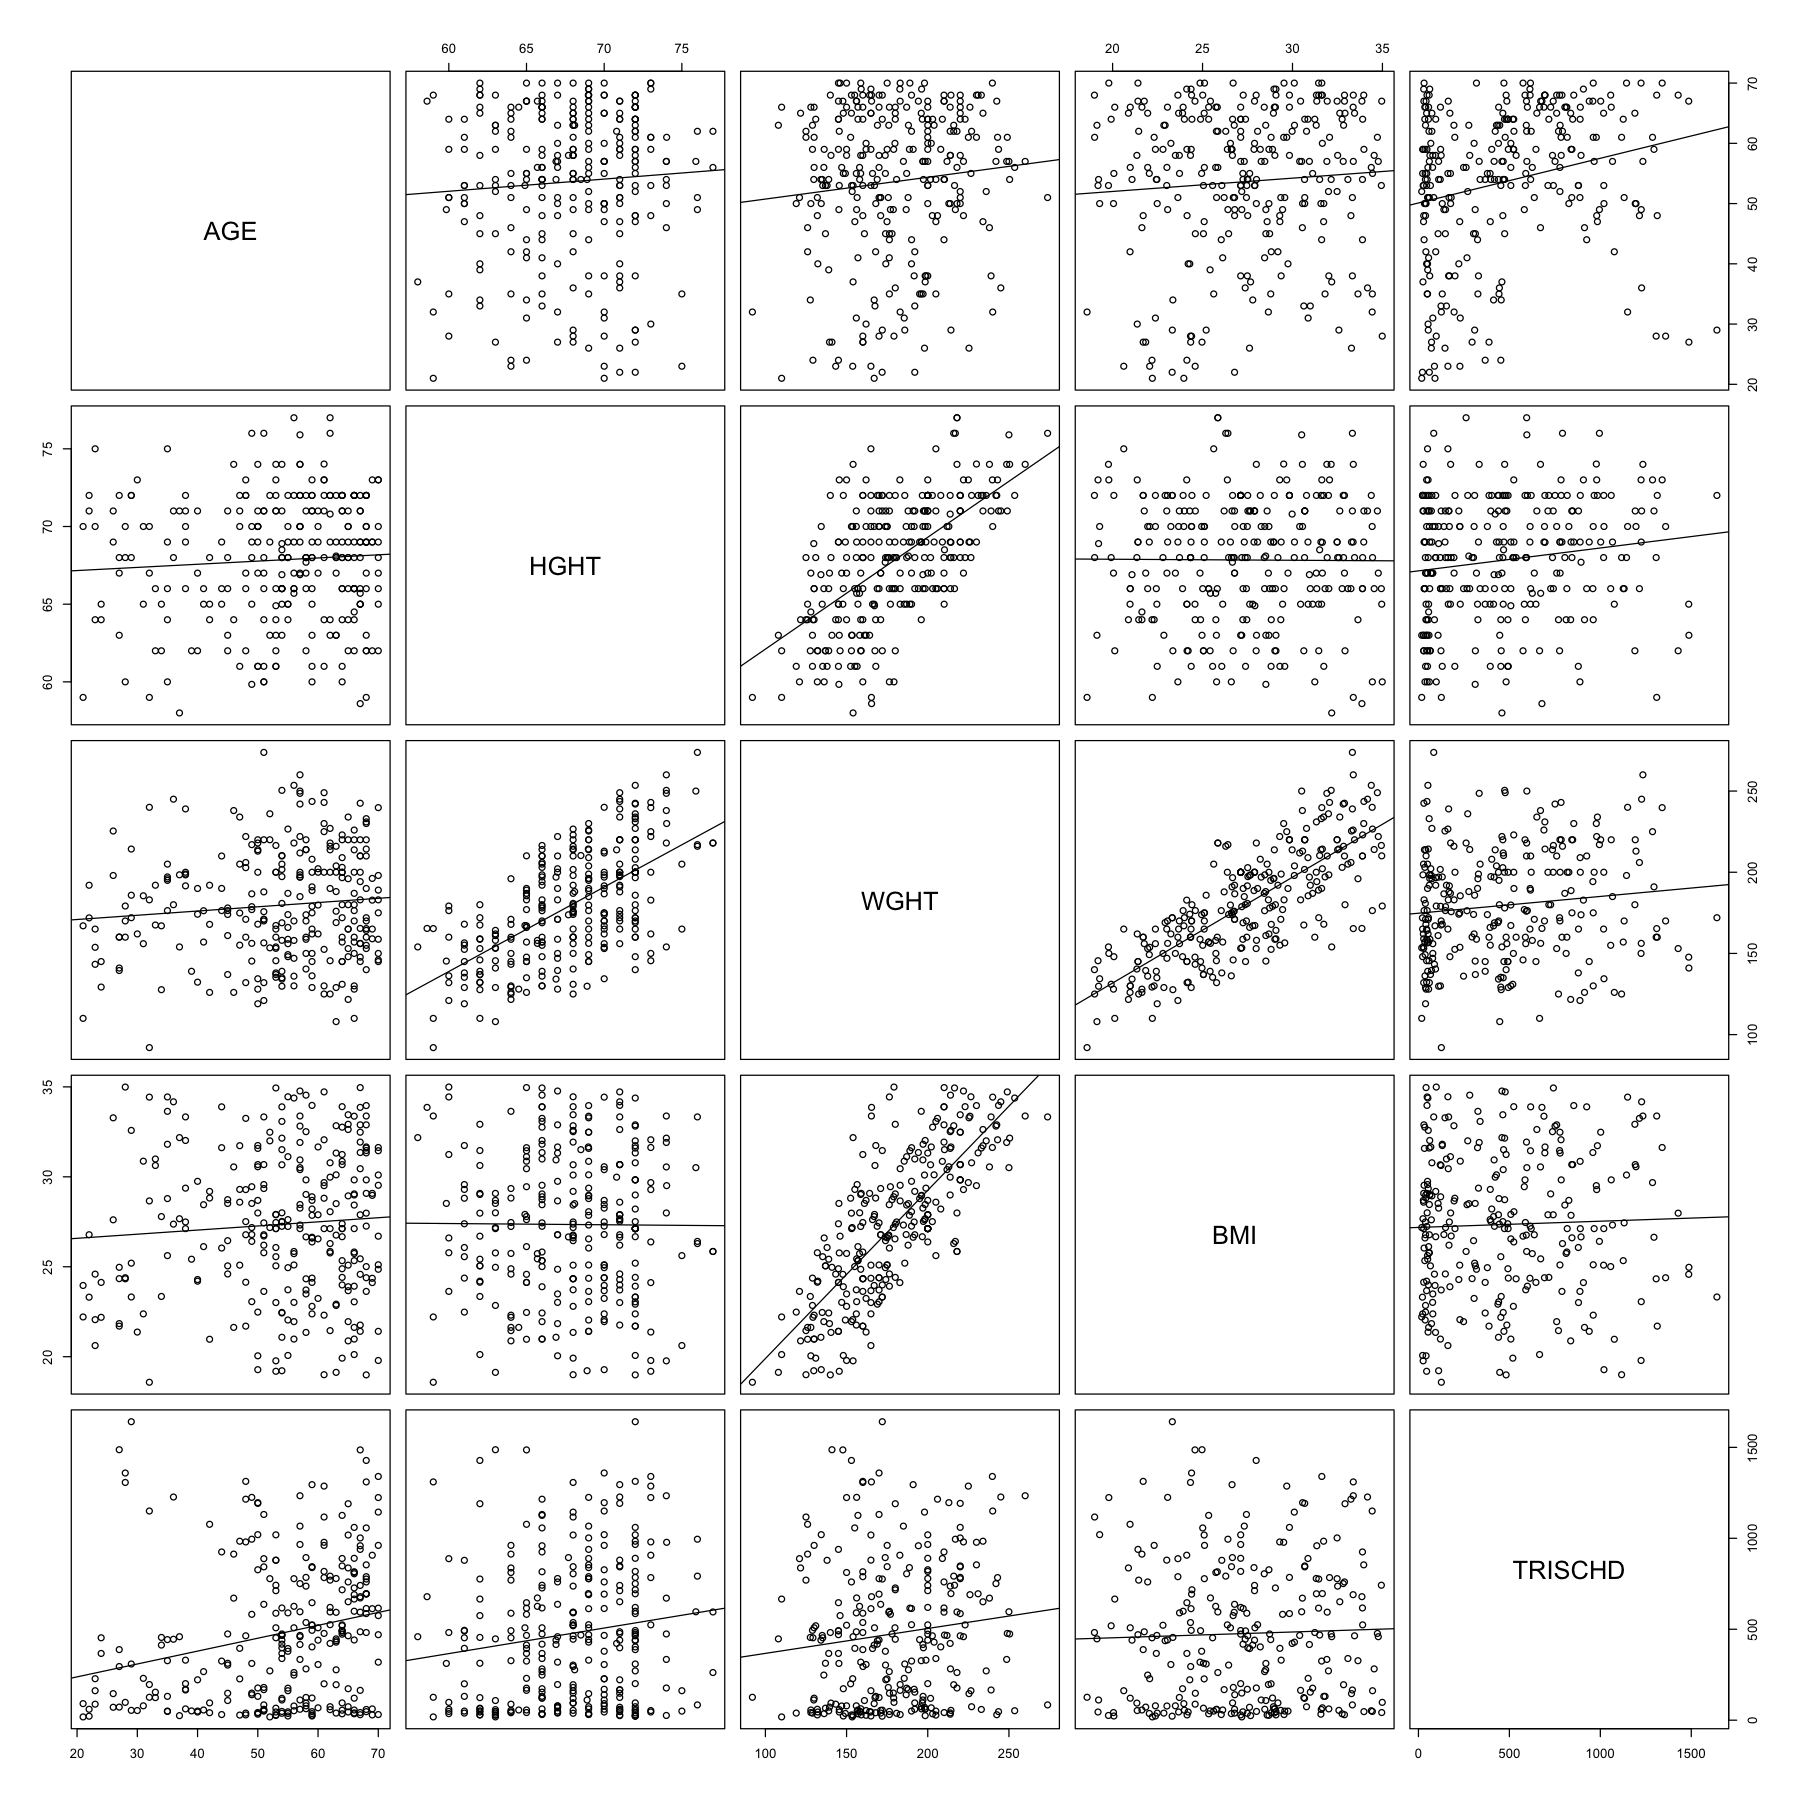

In [223]:
options(repr.plot.width=15, repr.plot.height=15)
pairs(~ AGE + HGHT + WGHT + BMI + TRISCHD, data=clinical_data, panel=function(x,y){
  points(x,y)
  linear_regression = lm(y~x)
  linear_regression_line = abline(linear_regression)
})

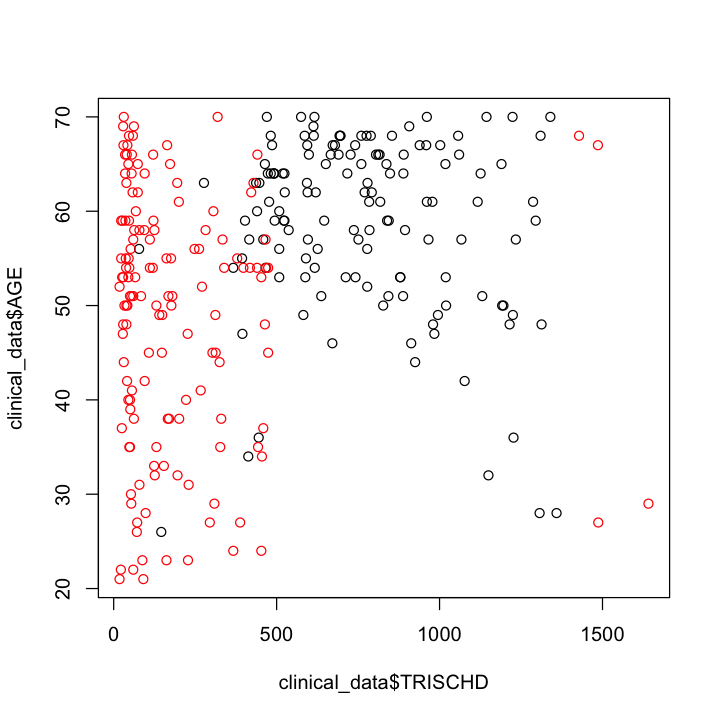

In [5]:
options(repr.plot.width=6, repr.plot.height=6)
plot(clinical_data$TRISCHD, clinical_data$AGE, col = ifelse(clinical_data$COHORT == "Organ Donor (OPO)", "red", "black"))

In [6]:
install.packages("corrplot")
library("corrplot")


Les packages binaires téléchargés sont dans
	/var/folders/df/d1fmsmr16731rc5wzhnmrp6c0000gn/T//Rtmp9zount/downloaded_packages


corrplot 0.92 loaded



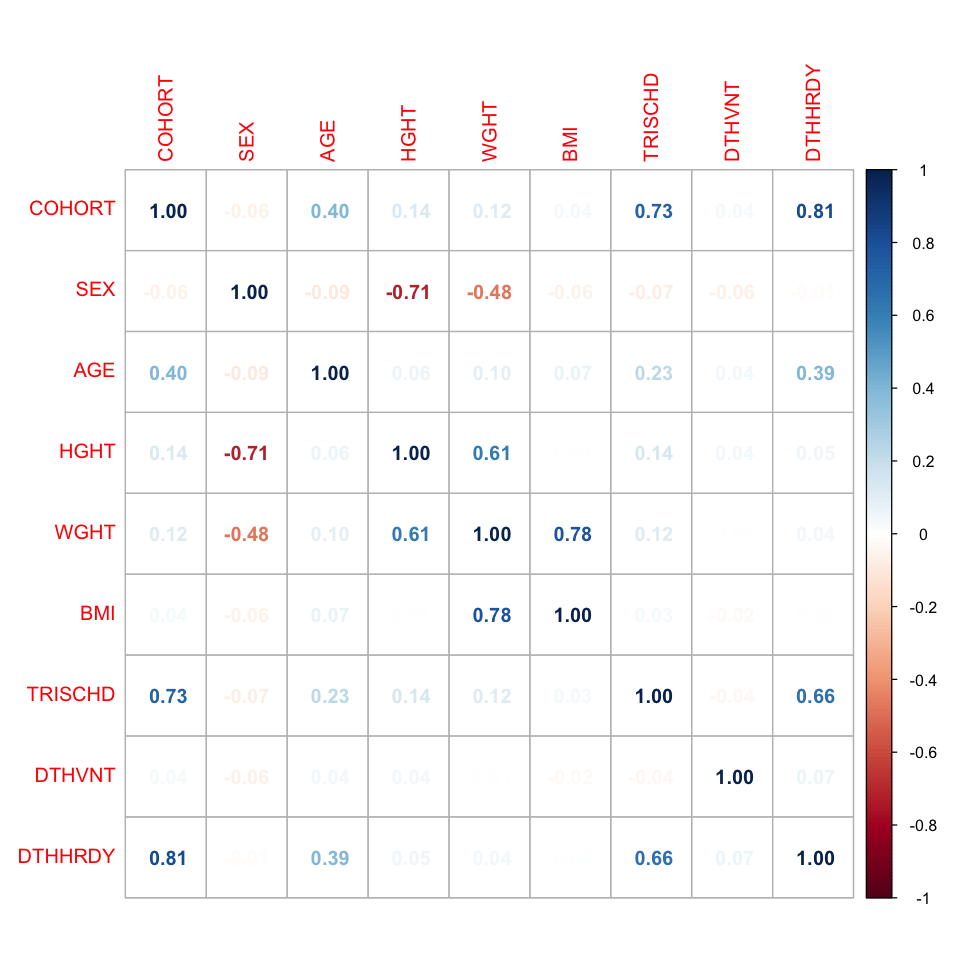

In [7]:
options(repr.plot.width=8, repr.plot.height=8)

COHORT = as.numeric(factor(clinical_data$COHORT))
M = cor(cbind(COHORT,clinical_data[,c(4,5,6,7,8,10,11,12)]))
corrplot(M, method = 'number')

## Question 2. Clinical data vs morphology

In [131]:
# Read the TSV file into a data frame
morphological_counts_init <- read.table("morphological_counts_lunit_dino.tsv", header = TRUE, sep = "\t")

#Give proper names to the rows of the morphological counts matrix
rownames(morphological_counts_init)<-morphological_counts_init$SMPLID

In [133]:
morphological_counts<-t(morphological_counts_init[,-1])
head(morphological_counts)

,GTEX.111YS.0526,GTEX.1122O.1126,GTEX.1128S.0326,GTEX.117XS.0426,GTEX.117YW.0226,GTEX.11DXX.0426,GTEX.11DXZ.0426,GTEX.11DYG.1226,GTEX.11EM3.0226,GTEX.11EMC.0926,⋯,GTEX.1R9K5.1426,GTEX.1R9PM.0326,GTEX.1R9PN.0226,GTEX.1R9PO.0226,GTEX.1RAZA.1126,GTEX.1RAZR.0626,GTEX.1RNTQ.0726,GTEX.1RQED.1126,GTEX.1S3DN.0626,GTEX.1S5ZA.1126
Mophological.cluster.G4_0,137,96,2,339,171,2,1,392,40,260,⋯,2,39,0,77,6,32,5,94,460,1
Mophological.cluster.G4_1,88,880,552,1,0,10,239,18,424,235,⋯,286,34,277,271,537,7,18,228,314,308
Mophological.cluster.G4_2,417,236,211,151,36,258,850,14,605,164,⋯,541,634,333,193,208,2,26,79,43,102
Mophological.cluster.G4_3,1,393,1031,637,791,1558,282,10,135,2,⋯,35,109,339,408,72,24,194,83,7,73
Mophological.cluster.G4_4,1,21,174,1844,1011,850,41,316,94,344,⋯,0,46,260,63,3,184,398,158,2,7
Mophological.cluster.G4_5,32,214,216,473,234,48,206,57,58,313,⋯,412,28,248,78,48,200,10,219,246,95


In [187]:
coldata<-as.matrix(clinical_data[,-c(1,2,9,13,14)])
head(coldata)
nrow(coldata)
ncol(morphological_counts)

COHORT,SEX,AGE,HGHT,WGHT,BMI,TRISCHD,DTHVNT,DTHHRDY
Organ Donor (OPO),1,62,72.00,227.0000,30.78,74,1,0
Organ Donor (OPO),2,64,66.00,203.0000,32.76,35,1,0
Postmortem,2,66,66.00,160.0000,25.82,816,0,2
Postmortem,1,64,71.00,220.0000,30.68,848,0,2
Postmortem,1,58,72.00,220.0000,29.83,785,0,3
Organ Donor (OPO),2,66,64.50,128.0000,21.63,56,1,0


[1] 280

[1] 280

In [220]:
median(clinical_data$AGE)
median(clinical_data$HGHT)
median(clinical_data$WGHT)
median(clinical_data$BMI)

[1] 56

[1] 68

[1] 176.37

[1] 27.29

In [308]:
for (variable in colnames(coldata)){
    object<-DESeqDataSetFromMatrix(countData = morphological_counts,
                                   colData = coldata,
                                   design = as.formula(paste("~",variable)))
    assign(paste("dds_",variable,sep=""),DESeq(object))
}

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”
  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not a warning or an error]

estimating size factors

  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not a warning or an error]

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
 

In [290]:
DEresults<-results(dds_COHORT)
DEresults<-DEresults[order(DEresults$pvalue),]
DEresults

log2 fold change (MLE): COHORT Postmortem vs Organ.Donor..OPO. 
Wald test p-value: COHORT Postmortem vs Organ.Donor..OPO. 
DataFrame with 32 rows and 6 columns
                            baseMean log2FoldChange     lfcSE       stat
                           <numeric>      <numeric> <numeric>  <numeric>
Mophological.cluster.G4_18   143.760        1.93523  0.248751    7.77981
Mophological.cluster.G4_30   137.577        1.03279  0.151631    6.81116
Mophological.cluster.G4_14   250.673        1.56133  0.234254    6.66510
Mophological.cluster.G4_1    303.370       -1.34888  0.232496   -5.80172
Mophological.cluster.G4_4    202.292        1.44716  0.263520    5.49165
...                              ...            ...       ...        ...
Mophological.cluster.G4_11   241.513      0.2024043 0.2299585  0.8801775
Mophological.cluster.G4_8    295.960      0.1868998 0.2325302  0.8037658
Mophological.cluster.G4_19   170.888      0.0648877 0.0922371  0.7034880
Mophological.cluster.G4_16   247.294 

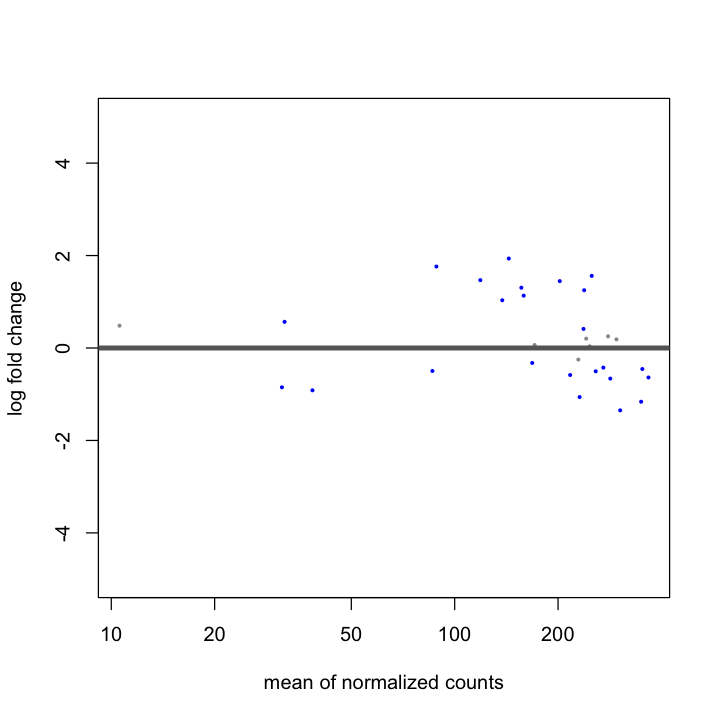

In [291]:
DESeq2::plotMA(object = dds_COHORT, ylim = c(-5, 5))

## Question 3. Morphology vs gene expression

In [125]:
# Read the TSV file into a data frame
RNA_read_counts_init <- read.table("RNA_read_counts.tsv", header = TRUE, sep = "\t")

# Display the first few rows of the data frame to verify it was read correctly
#head(RNA_read_counts)
dim(RNA_read_counts_init)
head(RNA_read_counts_init)

[1] 56200   282

,Name,Description,GTEX.111YS.0526,GTEX.1122O.1126,GTEX.1128S.0326,GTEX.117XS.0426,GTEX.117YW.0226,GTEX.11DXX.0426,GTEX.11DXZ.0426,GTEX.11DYG.1226,⋯,GTEX.1R9K5.1426,GTEX.1R9PM.0326,GTEX.1R9PN.0226,GTEX.1R9PO.0226,GTEX.1RAZA.1126,GTEX.1RAZR.0626,GTEX.1RNTQ.0726,GTEX.1RQED.1126,GTEX.1S3DN.0626,GTEX.1S5ZA.1126
,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,ENSG00000223972.5,DDX11L1,0,0,0,0,0,5,0,0,⋯,1,0,0,3,0,0,0,0,0,1
2,ENSG00000227232.5,WASH7P,78,70,180,78,152,76,132,143,⋯,134,142,140,69,183,61,157,103,57,70
3,ENSG00000278267.1,MIR6859-1,0,0,0,0,0,1,0,0,⋯,0,0,0,0,0,0,1,0,0,0
4,ENSG00000243485.5,MIR1302-2HG,0,0,1,0,0,0,0,0,⋯,0,0,0,1,0,0,1,0,0,0
5,ENSG00000237613.2,FAM138A,1,0,0,1,0,0,0,0,⋯,0,0,0,0,1,0,0,0,0,0
6,ENSG00000268020.3,OR4G4P,1,0,0,1,0,0,2,0,⋯,0,0,0,0,0,0,0,0,0,0


In [129]:
rownames(RNA_read_counts_init)<-RNA_read_counts_init$Name
RNA_read_counts<-as.matrix(RNA_read_counts_init[,-c(1,2)])
head(RNA_read_counts)

,GTEX.111YS.0526,GTEX.1122O.1126,GTEX.1128S.0326,GTEX.117XS.0426,GTEX.117YW.0226,GTEX.11DXX.0426,GTEX.11DXZ.0426,GTEX.11DYG.1226,GTEX.11EM3.0226,GTEX.11EMC.0926,⋯,GTEX.1R9K5.1426,GTEX.1R9PM.0326,GTEX.1R9PN.0226,GTEX.1R9PO.0226,GTEX.1RAZA.1126,GTEX.1RAZR.0626,GTEX.1RNTQ.0726,GTEX.1RQED.1126,GTEX.1S3DN.0626,GTEX.1S5ZA.1126
ENSG00000223972.5,0,0,0,0,0,5,0,0,0,0,⋯,1,0,0,3,0,0,0,0,0,1
ENSG00000227232.5,78,70,180,78,152,76,132,143,88,143,⋯,134,142,140,69,183,61,157,103,57,70
ENSG00000278267.1,0,0,0,0,0,1,0,0,0,1,⋯,0,0,0,0,0,0,1,0,0,0
ENSG00000243485.5,0,0,1,0,0,0,0,0,0,0,⋯,0,0,0,1,0,0,1,0,0,0
ENSG00000237613.2,1,0,0,1,0,0,0,0,0,0,⋯,0,0,0,0,1,0,0,0,0,0
ENSG00000268020.3,1,0,0,1,0,0,2,0,4,1,⋯,0,0,0,0,0,0,0,0,0,0


Let $X=\{x_1,\ldots,x_n\}$ be a sample of a univariate random variable. The _mean absolute deviation_ of $X$ is defined as the median of the absolute deviations from the sample's median, or in symbolic form

\begin{equation*}
\mathrm{MAD}=\mathrm{median}(\{\vert x_i-\mathrm{median}(X)\vert\,\vert\,i=1,\ldots,n\})
\end{equation*}

In [151]:
MAD<-numeric(nrow(RNA_read_counts))
for (i in 1:nrow(RNA_read_counts)){
    MAD[i]<-mad(RNA_read_counts[i,])
}
#Get the indices of the transcripts which are extremely little expressed
rows_to_remove<-which(MAD==0)

In [221]:
summary(MAD)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
     0.0      0.0      0.7    393.5     48.9 394697.8 

In [135]:
morphological_counts_init[-1]

,Mophological.cluster.G4_0,Mophological.cluster.G4_1,Mophological.cluster.G4_2,Mophological.cluster.G4_3,Mophological.cluster.G4_4,Mophological.cluster.G4_5,Mophological.cluster.G4_6,Mophological.cluster.G4_7,Mophological.cluster.G4_8,Mophological.cluster.G4_9,⋯,Mophological.cluster.G4_22,Mophological.cluster.G4_23,Mophological.cluster.G4_24,Mophological.cluster.G4_25,Mophological.cluster.G4_26,Mophological.cluster.G4_27,Mophological.cluster.G4_28,Mophological.cluster.G4_29,Mophological.cluster.G4_30,Mophological.cluster.G4_31
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
GTEX.111YS.0526,137,88,417,1,1,32,1,1,1,167,⋯,262,233,31,417,80,144,250,664,20,0
GTEX.1122O.1126,96,880,236,393,21,214,1,47,39,291,⋯,3350,99,190,495,278,774,694,268,145,0
GTEX.1128S.0326,2,552,211,1031,174,216,289,0,493,663,⋯,831,135,250,161,82,120,377,2,500,0
GTEX.117XS.0426,339,1,151,637,1844,473,260,3,440,153,⋯,148,166,43,49,158,211,184,142,277,3
GTEX.117YW.0226,171,0,36,791,1011,234,162,0,54,129,⋯,106,68,1,0,76,489,68,281,254,6
GTEX.11DXX.0426,2,10,258,1558,850,48,0,11,2491,325,⋯,8,89,952,0,26,197,323,5,70,0
GTEX.11DXZ.0426,1,239,850,282,41,206,1,370,839,291,⋯,138,342,1459,64,491,38,310,3,46,4
GTEX.11DYG.1226,392,18,14,10,316,57,742,5,232,123,⋯,12,124,129,1,116,254,238,483,185,8
GTEX.11EM3.0226,40,424,605,135,94,58,861,4,11,349,⋯,134,285,637,49,304,143,558,27,542,0


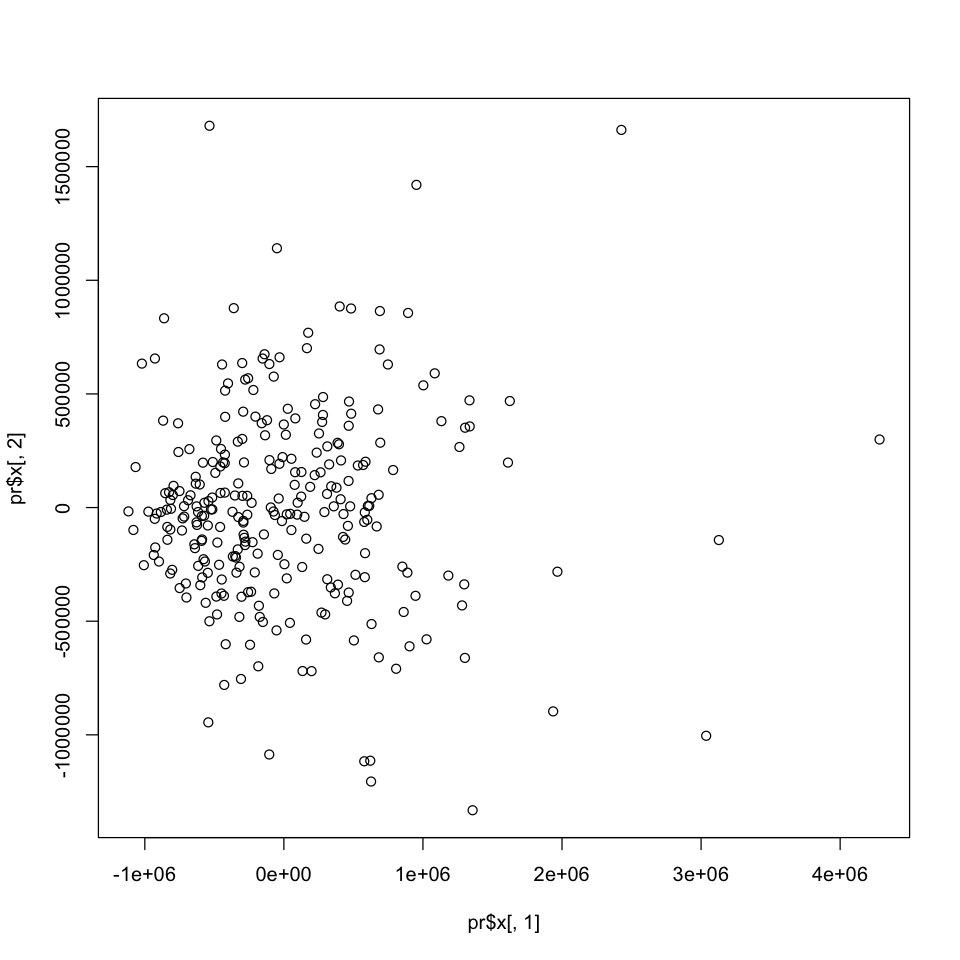

In [130]:
pr = prcomp(t(RNA_read_counts))
plot(pr$x[,1],pr$x[,2])

In [10]:
summary(pr)

Importance of components:
                             PC1       PC2       PC3       PC4       PC5
Standard deviation     7.238e+05 4.303e+05 4.107e+05 2.172e+05 1.806e+05
Proportion of Variance 4.182e-01 1.478e-01 1.346e-01 3.765e-02 2.604e-02
Cumulative Proportion  4.182e-01 5.660e-01 7.006e-01 7.383e-01 7.643e-01
                             PC6       PC7       PC8       PC9      PC10
Standard deviation     1.717e+05 1.547e+05 1.394e+05 1.382e+05 1.288e+05
Proportion of Variance 2.352e-02 1.911e-02 1.552e-02 1.525e-02 1.325e-02
Cumulative Proportion  7.879e-01 8.070e-01 8.225e-01 8.377e-01 8.510e-01
                            PC11      PC12      PC13      PC14      PC15
Standard deviation     1.230e+05 1.141e+05 1.126e+05 1.054e+05 9.733e+04
Proportion of Variance 1.207e-02 1.040e-02 1.012e-02 8.870e-03 7.560e-03
Cumulative Proportion  8.630e-01 8.734e-01 8.836e-01 8.924e-01 9.000e-01
                            PC16      PC17      PC18      PC19      PC20
Standard deviation     9.

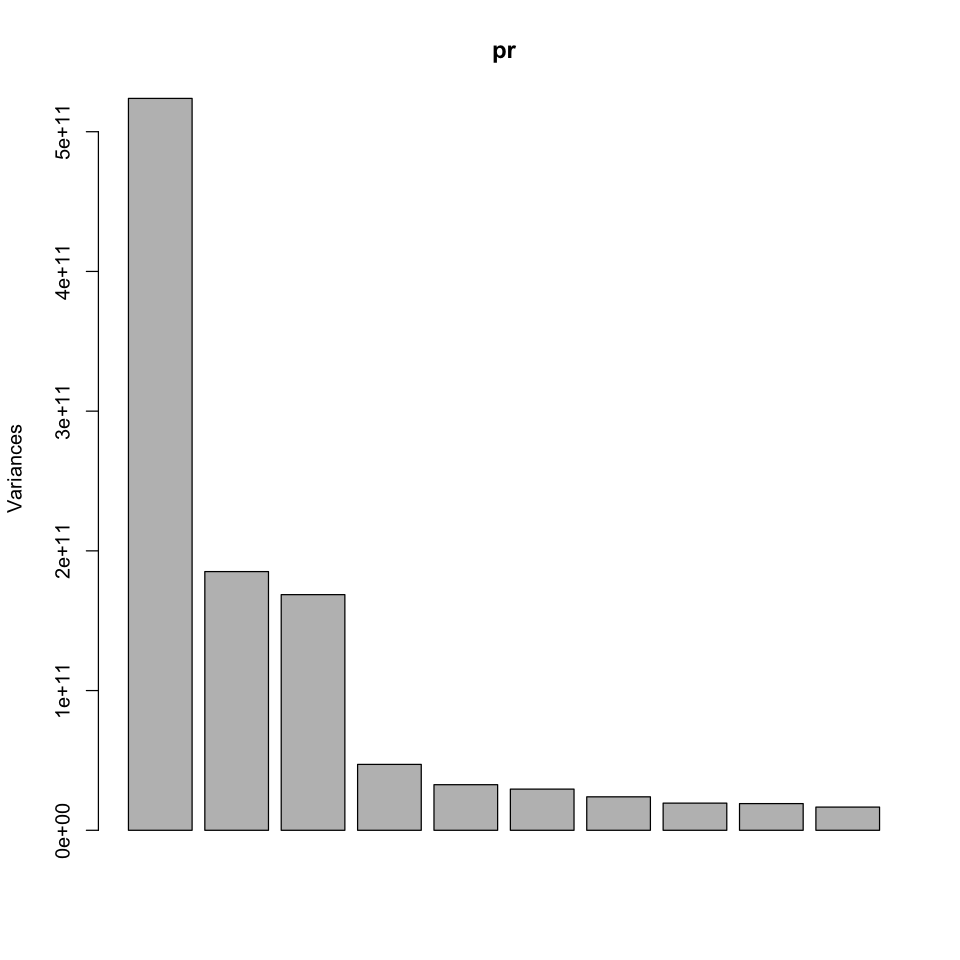

In [11]:
plot(pr)

In [14]:
if (!require("BiocManager", quietly = TRUE))
    install.packages("BiocManager")

BiocManager::install("DESeq2")

Bioconductor version '3.18' is out-of-date; the current release version '3.19'
  is available with R version '4.4'; see https://bioconductor.org/install

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.r-project.org

Bioconductor version 3.18 (BiocManager 1.30.22), R 4.3.1 (2023-06-16)

Installing package(s) 'DESeq2'




Les packages binaires téléchargés sont dans
	/var/folders/df/d1fmsmr16731rc5wzhnmrp6c0000gn/T//Rtmp9zount/downloaded_packages


Old packages: 'BH', 'BiocFileCache', 'BiocManager', 'biomaRt', 'Biostrings',
  'boot', 'brew', 'brio', 'broom', 'broom.helpers', 'BSgenome', 'bslib',
  'cachem', 'callr', 'codetools', 'commonmark', 'curl', 'data.table', 'DBI',
  'dbplyr', 'deldir', 'digest', 'edgeR', 'farver', 'fastmap', 'forecast', 'fs',
  'GenomeInfoDb', 'GenomicAlignments', 'GenomicFeatures', 'ggplot2', 'ggstats',
  'gh', 'glue', 'gtable', 'htmltools', 'httpuv', 'httr2', 'interp',
  'KernSmooth', 'knitr', 'labelled', 'lattice', 'lda', 'locfit', 'matrixStats',
  'mboost', 'mgcv', 'munsell', 'openssl', 'pbdZMQ', 'pixmap', 'pkgbuild',
  'pkgdown', 'pkgload', 'processx', 'promises', 'ps', 'R.oo', 'ragg', 'Rcpp',
  'RcppArmadillo', 'RcppEigen', 'RCurl', 'readr', 'remotes', 'repr', 'Rhtslib',
  'rlang', 'rmarkdown', 'roxygen2', 'RSQLite', 'rstudioapi', 'Rsubread',
  'rvest', 'S4Arrays', 'sass', 'segmented', 'shiny', 'sm', 'sp', 'SparseArray',
  'stringi', 'survival', 'systemfonts', 'testthat', 'tidyr', 'tidyselect',
  'ti

In [16]:
library(DESeq2)

Warning message:
“le package ‘DESeq2’ a été compilé avec la version R 4.3.3”
Le chargement a nécessité le package : S4Vectors

Warning message:
“le package ‘S4Vectors’ a été compilé avec la version R 4.3.2”
Le chargement a nécessité le package : stats4

Le chargement a nécessité le package : BiocGenerics


Attachement du package : ‘BiocGenerics’


Les objets suivants sont masqués depuis ‘package:stats’:

    IQR, mad, sd, var, xtabs


Les objets suivants sont masqués depuis ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, setdiff, sort,
    table, tapply, union, unique, unsplit, which.max, which.min



Attachement du package : ‘S4Vectors’


L'objet suivant est masqué depuis ‘package:utils’:

    findMat

In [222]:
install.packages("pheatmap")
library(pheatmap)
pheatmap(RNA_read_counts, scale = 'row', show_rownames = FALSE)


Les packages binaires téléchargés sont dans
	/var/folders/df/d1fmsmr16731rc5wzhnmrp6c0000gn/T//Rtmp9zount/downloaded_packages


## The theory behind DESeq2